In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import os

from blume.model.post_props import Prop
from blume.process import plot_file, exact_m
from blume.run import Results, ModelParameters

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

chis = [4, 8, 12, 24]

In [3]:
result = Results(varying_param= "chi", range=chis)
params = ModelParameters(T_range=(2.23, 2.29), step=0.0001, tol=1e-9, max_steps=int(10e8), use_prev=False)
result.get(params)

chi=4: 100%|██████████| 601/601 [08:06<00:00,  1.23it/s]  


Saving data in folder: '28-04 13:04'
Done 



chi=8: 100%|██████████| 601/601 [08:09<00:00,  1.23it/s]


Saving data in folder: '28-04 13:04'
Done 



chi=12: 100%|██████████| 601/601 [13:17<00:00,  1.33s/it]  


Saving data in folder: '28-04 13:04'
Done 



chi=24:  66%|██████▌   | 395/601 [29:39<15:28,  4.51s/it]  


KeyboardInterrupt: 

In [2]:
# Make dir for saving the plots
dir = "28-04 13:04"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

## Phase diagram

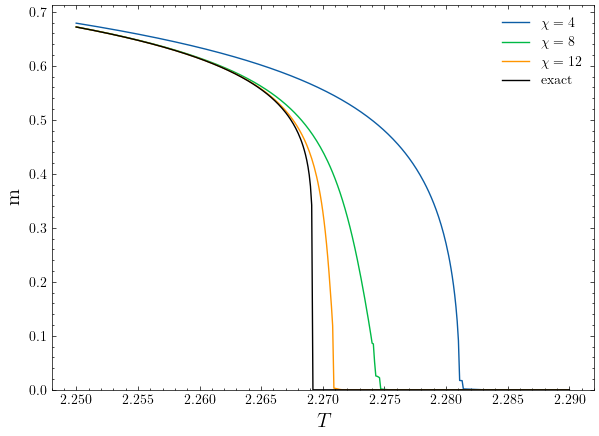

In [3]:
chis = [4, 8, 12]
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.29)
for chi in chis:
    line = plot_file(fn=f"chi{chi}", range=T_range, prop=Prop.m, folder=dir)
    line.set_label(rf"$\chi = {chi}$")
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="exact")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

## Free energy

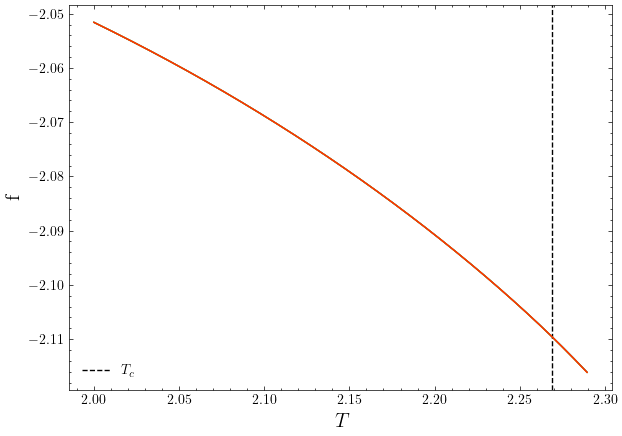

In [15]:
plt.figure(figsize=(7, 5))
T_range = (1, 4)
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    plot_file(val=chi, range=T_range, prop=Prop.f, folder=dir, param="chi")

plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"f", fontsize=15)
plt.savefig(f"{path_dir}/free energies")

## Computational cost

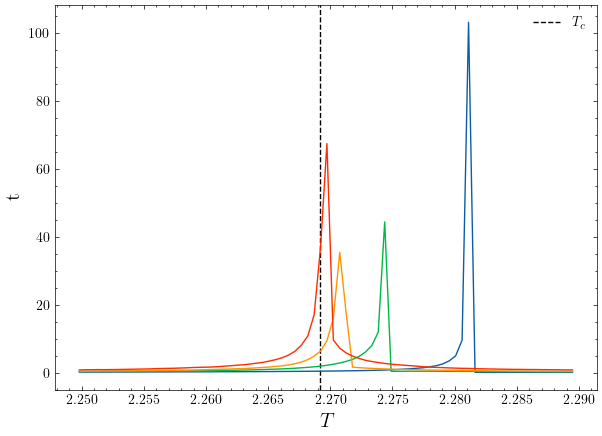

In [16]:
plt.figure(figsize=(7, 5))
T_range = (2.25, 4)
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    plot_file(param="chi", range=T_range, prop="execution times", folder=dir, val=chi)

plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"t", fontsize=15)
plt.savefig(f"{path_dir}/execution times")

## Energy per site

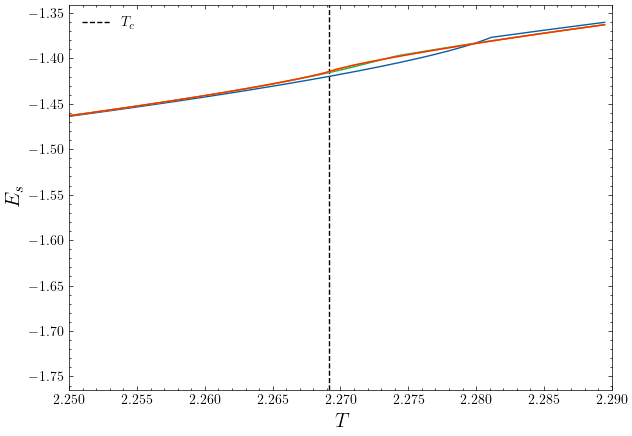

In [17]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2, 2.3)
for chi in chis:
    plot_file(val=chi,param="chi", range=T_range, prop=Prop.Es, folder=dir)
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.xlim(2.25, 2.29)
plt.ylabel(r"$E_s$", fontsize=15)
plt.savefig(f"{path_dir}/energies per site")

## Correlation length

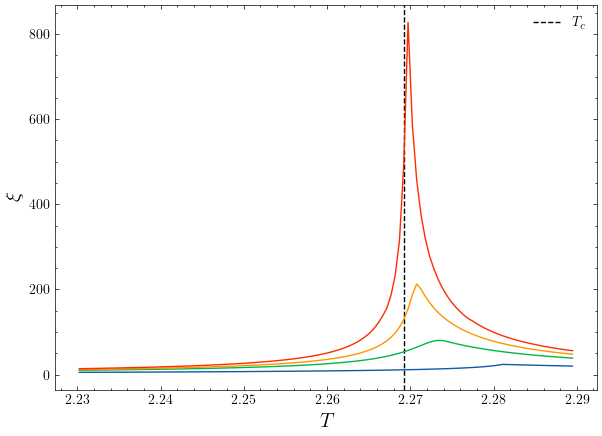

In [18]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2.23, 2.3)
for chi in chis:
    plot_file(val=chi, range=T_range, prop=Prop.xi, folder=dir, param="chi")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$\xi$", fontsize=15)
plt.savefig(f"{path_dir}/correlation length")